In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('Images/Fig0316(2)(2nd_from_top).tif')
img

array([[[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [107, 107, 107],
        [107, 107, 107],
        [105, 105, 105]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [106, 106, 106],
        [106, 106, 106],
        [104, 104, 104]],

       [[ 91,  91,  91],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [103, 103, 103],
        [103, 103, 103],
        [101, 101, 101]],

       ...,

       [[ 96,  96,  96],
        [ 91,  91,  91],
        [ 91,  91,  91],
        ...,
        [122, 122, 122],
        [121, 121, 121],
        [121, 121, 121]],

       [[ 97,  97,  97],
        [ 94,  94,  94],
        [ 91,  91,  91],
        ...,
        [121, 121, 121],
        [120, 120, 120],
        [119, 119, 119]],

       [[ 98,  98,  98],
        [ 96,  96,  96],
        [ 91,  91,  91],
        ...,
        [120, 120, 120],
        [120, 120, 120],
        [117, 117, 117]]

In [4]:
print("Enter the values of r1 and s1")
r1 = int(input())
s1 = int(input())
print(f" (r1, s1) = ({r1}, {s1})")
print("Enter the values of r2 and s2")
r2 = int(input())
s2 = int(input())
print(f" (r2, s2) = ({r2}, {s2})")

Enter the values of r1 and s1
 (r1, s1) = (50, 60)
Enter the values of r2 and s2
 (r2, s2) = (120, 130)


(-0.5, 499.5, 499.5, -0.5)

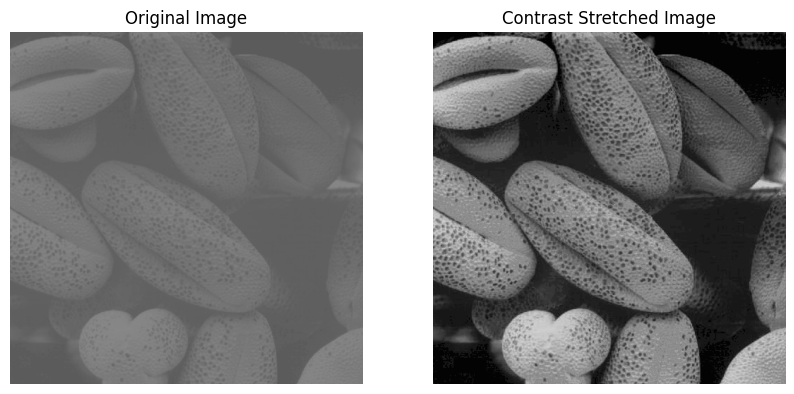

In [5]:
l, m, n = 1.2, 5, 5
output_image = np.zeros_like(img, dtype=np.uint8)
mask1 = img <= r1
mask2 = (img > r1) & (img <= r2)
mask3 = img > r2

output_image[mask1] = l * img[mask1]
output_image[mask2] = m * img[mask2] + s1
output_image[mask3] = n * (img[mask3] - r2) + s2

output_image = np.clip(output_image, 0, 255).astype(np.uint8)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

# Bit Plane Slicing

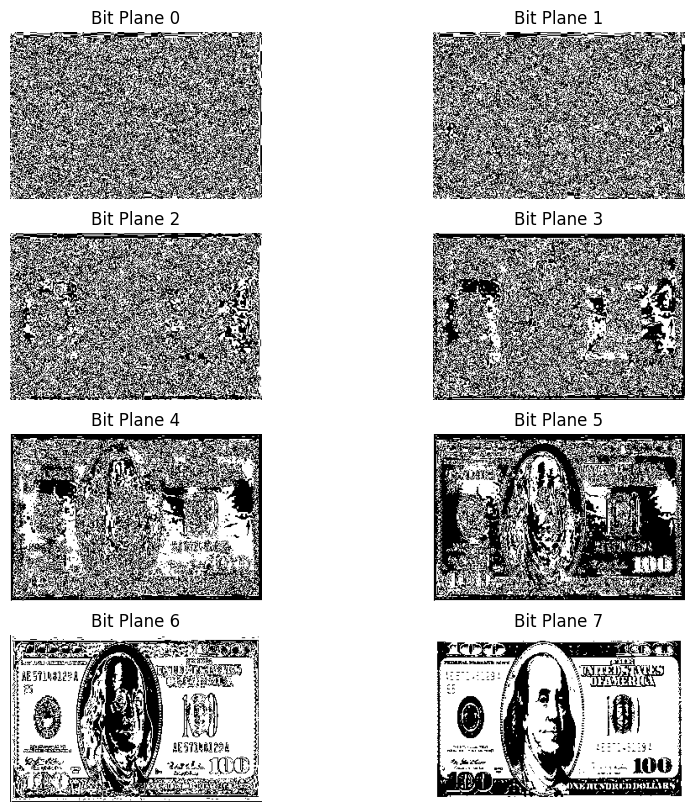

In [7]:
num_bits = 8
img2 = cv2.imread('Images/Bit plane slicing.bmp')

# create a list to store the bit planes
bit_planes = []

# Extract the bit planes
for i in range(num_bits):
    # Right shift the image by i bits and mask with 1 to get the i-th bit plane
    bit_plane = (img2 >> i) & 1
    # Scale the bit plane to 0-255 for visualization
    bit_plane = (bit_plane * 255).astype(np.uint8)
    bit_planes.append(bit_plane)
# Display the bit planes
plt.figure(figsize=(10, 10))
for i in range(num_bits):
    plt.subplot(4, 2, i + 1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis('off')
# plt.tight_layout()
plt.show()

# Gray Level Slicing

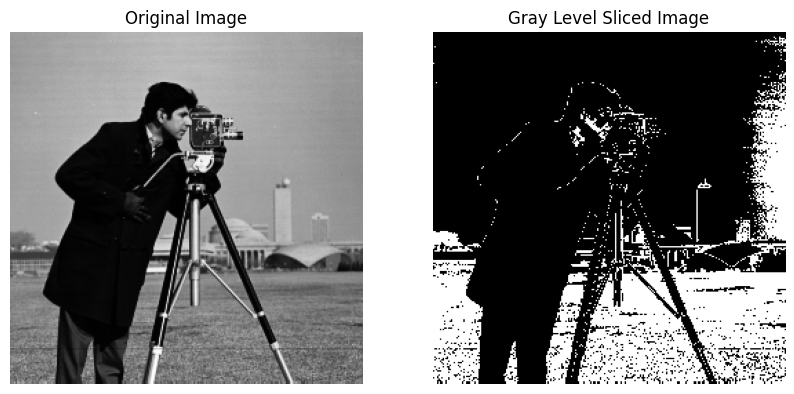

In [9]:
img3 = cv2.imread('Images/cameraman.bmp', cv2.IMREAD_GRAYSCALE)

# Define the range of gray levels to be sliced
t1 = 100
t2 = 150

# Create a new image for gray level slicing
sliced_image = np.zeros_like(img3, dtype=np.uint8)
# Set the pixels in the range [t1, t2] to 255 (white)
sliced_image[(img3 >= t1) & (img3 <= t2)] = 255

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img3, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sliced_image, cmap='gray')
plt.title('Gray Level Sliced Image')
plt.axis('off')
plt.show()
